In [2]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Read file from github
datafile = "https://raw.githubusercontent.com/shionguha/inf2178-expdesignfordatascience-w23/main/project dataset/Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv"
url = datafile.replace(" ", "%20")
data = pd.read_csv(url)

In [4]:
# Check the NA values in each column
data.isnull().sum()

Arrest_Year                            0
Arrest_Month                           0
EventID                                0
ArrestID                             469
PersonID                               0
Perceived_Race                         4
Sex                                    0
Age_group__at_arrest_                 24
Youth_at_arrest__under_18_years        0
ArrestLocDiv                           0
StripSearch                            0
Booked                                 0
Occurrence_Category                  165
Actions_at_arrest___Concealed_i        0
Actions_at_arrest___Combative__        0
Actions_at_arrest___Resisted__d        0
Actions_at_arrest___Mental_inst        0
Actions_at_arrest___Assaulted_o        0
Actions_at_arrest___Cooperative        0
SearchReason_CauseInjury           57475
SearchReason_AssistEscape          57475
SearchReason_PossessWeapons        57475
SearchReason_PossessEvidence       57475
ItemsFound                         57475
ObjectId        

In [5]:
# Drop NA for race_column as it only contains 4
# Drop all search reason columns and items found as it wont be applied to reaseach questions
race_data = data.dropna(subset=['Perceived_Race'])
race_data = race_data.drop(columns=['SearchReason_CauseInjury', 
                                    'SearchReason_AssistEscape',
                                    'SearchReason_PossessWeapons', 
                                    'SearchReason_PossessEvidence', 
                                    'ItemsFound'])
race_data.head()

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,StripSearch,Booked,Occurrence_Category,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,ObjectId
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,1,1
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0,2
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0,3
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,0,0,Harassment/Threatening,0,0,0,0,0,0,4
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,0,1,FTA/FTC/Compliance Check/Parollee,0,0,0,0,0,0,5


In [6]:
# Value counts for each column to see if there is unknown in words
for c in race_data.columns:
    print ("---- %s ---" % c)
    print (race_data[c].value_counts())

---- Arrest_Year ---
2021    33295
2020    31977
Name: Arrest_Year, dtype: int64
---- Arrest_Month ---
Jan-Mar      17612
July-Sept    16770
Oct-Dec      15705
Apr-June     15185
Name: Arrest_Month, dtype: int64
---- EventID ---
1019158    43
1038511    24
1015267    20
1034557    19
1036574    19
           ..
1033701     1
1033623     1
1014582     1
1005507     1
1033395     1
Name: EventID, Length: 60000, dtype: int64
---- ArrestID ---
6020159.0    2
6032599.0    2
6017884.0    1
6061371.0    1
6004234.0    1
            ..
6051025.0    1
6024710.0    1
6002740.0    1
6025714.0    1
6032145.0    1
Name: ArrestID, Length: 64802, dtype: int64
---- PersonID ---
327486    54
331300    46
310375    41
303892    39
330299    35
          ..
314360     1
323851     1
333321     1
331773     1
310583     1
Name: PersonID, Length: 37345, dtype: int64
---- Perceived_Race ---
White                   27723
Black                   17526
Unknown or Legacy        5056
East/Southeast Asian     441

In [7]:
# Check value count for race column, frequency table
race_data['Perceived_Race'].value_counts()

White                   27723
Black                   17526
Unknown or Legacy        5056
East/Southeast Asian     4415
South Asian              3613
Middle-Eastern           3237
Indigenous               1934
Latino                   1768
Name: Perceived_Race, dtype: int64

In [8]:
# Frequency Table for stripsearch based on race
race_data[['StripSearch','Perceived_Race']].groupby('Perceived_Race').describe()

StripSearch                                             
                           count      mean       std  min  25%  50%  75%  max
Perceived_Race                                                               
Black                    17526.0  0.138879  0.345830  0.0  0.0  0.0  0.0  1.0
East/Southeast Asian      4415.0  0.077237  0.266997  0.0  0.0  0.0  0.0  1.0
Indigenous                1934.0  0.158221  0.365043  0.0  0.0  0.0  0.0  1.0
Latino                    1768.0  0.074661  0.262917  0.0  0.0  0.0  0.0  1.0
Middle-Eastern            3237.0  0.070436  0.255919  0.0  0.0  0.0  0.0  1.0
South Asian               3613.0  0.071132  0.257081  0.0  0.0  0.0  0.0  1.0
Unknown or Legacy         5056.0  0.106013  0.307884  0.0  0.0  0.0  0.0  1.0
White                    27723.0  0.128630  0.334796  0.0  0.0  0.0  0.0  1.0

In [9]:
# Descriptive Statistics for stripsearch based on sex
race_data[['StripSearch','Sex']].groupby('Sex').describe()

StripSearch                                             
          count      mean       std  min  25%  50%  75%  max
Sex                                                         
F       12616.0  0.101696  0.302260  0.0  0.0  0.0  0.0  1.0
M       52647.0  0.123787  0.329341  0.0  0.0  0.0  0.0  1.0
U           9.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0

In [10]:
# Since Unisex in only 9 samples and it is too small sample size to work with, drop Unisex
race_data = (race_data[race_data['Sex'].str.contains('U') == False])

In [11]:
# Copy of the dataset with cleanning procedure to divide sub-dataset
race_copy = race_data.copy(deep=True)
race_copy.head()

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,StripSearch,Booked,Occurrence_Category,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,ObjectId
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,1,1
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0,2
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0,3
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,0,0,Harassment/Threatening,0,0,0,0,0,0,4
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,0,1,FTA/FTC/Compliance Check/Parollee,0,0,0,0,0,0,5


In [12]:
# Mutate month column from text based with string type categorical number
race_data['Arrest_Month'] = race_data[
    'Arrest_Month'].replace(['Jan-Mar'], '1')
race_data['Arrest_Month'] = race_data[
    'Arrest_Month'].replace(['Apr-June'], '2')
race_data['Arrest_Month'] = race_data[
    'Arrest_Month'].replace(['July-Sept'], '3')
race_data['Arrest_Month'] = race_data[
    'Arrest_Month'].replace(['Oct-Dec'], '4')
race_data.head()

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,StripSearch,Booked,Occurrence_Category,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,ObjectId
0,2020,3,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,1,1
1,2020,3,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0,2
2,2020,4,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0,3
3,2021,1,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,0,0,Harassment/Threatening,0,0,0,0,0,0,4
4,2021,1,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,0,1,FTA/FTC/Compliance Check/Parollee,0,0,0,0,0,0,5


In [13]:
# Mutate race column from text based with string type categorical number
# Based on highest from lowest frequency
race_data['Perceived_Race'] = race_data[
    'Perceived_Race'].replace(['White'], '1')
race_data['Perceived_Race'] = race_data[
    'Perceived_Race'].replace(['Black'], '2')
race_data['Perceived_Race'] = race_data[
    'Perceived_Race'].replace(['Unknown or Legacy'], '3')
race_data['Perceived_Race'] = race_data[
    'Perceived_Race'].replace(['East/Southeast Asian'], '4')
race_data['Perceived_Race'] = race_data[
    'Perceived_Race'].replace(['South Asian'], '5')
race_data['Perceived_Race'] = race_data[
    'Perceived_Race'].replace(['Middle-Eastern'], '6')
race_data['Perceived_Race'] = race_data[
    'Perceived_Race'].replace(['Indigenous'], '7')
race_data['Perceived_Race'] = race_data[
    'Perceived_Race'].replace(['Latino'], '8')
race_data.head()

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,StripSearch,Booked,Occurrence_Category,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,ObjectId
0,2020,3,1005907,6017884.0,326622,1,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,1,1
1,2020,3,1014562,6056669.0,326622,1,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0,2
2,2020,4,1029922,6057065.0,326622,3,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0,3
3,2021,1,1052190,6029059.0,327535,2,M,Aged 25 to 34 years,Not a youth,XX,0,0,Harassment/Threatening,0,0,0,0,0,0,4
4,2021,1,1015512,6040372.0,327535,5,M,Aged 25 to 34 years,Not a youth,XX,0,1,FTA/FTC/Compliance Check/Parollee,0,0,0,0,0,0,5


In [14]:
# Mutate sex from text based with string type numerical categorical number
race_data['Sex'] = race_data['Sex'].replace(['M'], '1')
race_data['Sex'] = race_data['Sex'].replace(['F'], '2')
race_data.head()

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,StripSearch,Booked,Occurrence_Category,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,ObjectId
0,2020,3,1005907,6017884.0,326622,1,1,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,1,1
1,2020,3,1014562,6056669.0,326622,1,1,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0,2
2,2020,4,1029922,6057065.0,326622,3,1,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0,3
3,2021,1,1052190,6029059.0,327535,2,1,Aged 25 to 34 years,Not a youth,XX,0,0,Harassment/Threatening,0,0,0,0,0,0,4
4,2021,1,1015512,6040372.0,327535,5,1,Aged 25 to 34 years,Not a youth,XX,0,1,FTA/FTC/Compliance Check/Parollee,0,0,0,0,0,0,5


In [15]:
# Mutate age group from text to string type numerical categorical number
# group same condition with same number and fill null with 999
race_data['Age_group__at_arrest_'] = race_data[
    'Age_group__at_arrest_'].replace(['Aged 17 years and under'], '1')
race_data['Age_group__at_arrest_'] = race_data[
    'Age_group__at_arrest_'].replace(['Aged 17 years and younger'], '1')
race_data['Age_group__at_arrest_'] = race_data[
    'Age_group__at_arrest_'].replace(['Aged 18 to 24 years'], '2')
race_data['Age_group__at_arrest_'] = race_data[
    'Age_group__at_arrest_'].replace(['Aged 25 to 34 years'], '3')
race_data['Age_group__at_arrest_'] = race_data[
    'Age_group__at_arrest_'].replace(['Aged 35 to 44 years'], '4')
race_data['Age_group__at_arrest_'] = race_data[
    'Age_group__at_arrest_'].replace(['Aged 45 to 54 years'], '5')
race_data['Age_group__at_arrest_'] = race_data[
    'Age_group__at_arrest_'].replace(['Aged 55 to 64 years'], '6')
race_data['Age_group__at_arrest_'] = race_data[
    'Age_group__at_arrest_'].replace(['Aged 65 and older'], '7')
race_data['Age_group__at_arrest_'] = race_data[
    'Age_group__at_arrest_'].replace(['Aged 65 years and older'], '7')
race_data['Age_group__at_arrest_'].fillna('999', inplace = True)
race_data.head()

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,StripSearch,Booked,Occurrence_Category,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,ObjectId
0,2020,3,1005907,6017884.0,326622,1,1,4,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,1,1
1,2020,3,1014562,6056669.0,326622,1,1,4,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0,2
2,2020,4,1029922,6057065.0,326622,3,1,4,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0,3
3,2021,1,1052190,6029059.0,327535,2,1,3,Not a youth,XX,0,0,Harassment/Threatening,0,0,0,0,0,0,4
4,2021,1,1015512,6040372.0,327535,5,1,3,Not a youth,XX,0,1,FTA/FTC/Compliance Check/Parollee,0,0,0,0,0,0,5


In [16]:
# Mutate Youth_at_arrest__under_18_year
race_data['Youth_at_arrest__under_18_years'] = race_data[
    'Youth_at_arrest__under_18_years'].replace(['Not a youth'], '1')
race_data['Youth_at_arrest__under_18_years'] = race_data[
    'Youth_at_arrest__under_18_years'].replace(
        ['Youth (aged 17 and younger)'], '2')
race_data['Youth_at_arrest__under_18_years'] = race_data[
    'Youth_at_arrest__under_18_years'].replace(
        ['Youth (aged 17 years and under)'], '3')
race_data.head()

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,StripSearch,Booked,Occurrence_Category,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,ObjectId
0,2020,3,1005907,6017884.0,326622,1,1,4,1,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,1,1
1,2020,3,1014562,6056669.0,326622,1,1,4,1,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0,2
2,2020,4,1029922,6057065.0,326622,3,1,4,1,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0,3
3,2021,1,1052190,6029059.0,327535,2,1,3,1,XX,0,0,Harassment/Threatening,0,0,0,0,0,0,4
4,2021,1,1015512,6040372.0,327535,5,1,3,1,XX,0,1,FTA/FTC/Compliance Check/Parollee,0,0,0,0,0,0,5


In [17]:
# Covert string into integer for all mutate columns
race_data.Arrest_Month = race_data.Arrest_Month.astype('int64')
race_data.Perceived_Race = race_data.Perceived_Race.astype('int64')
race_data.Sex = race_data.Sex.astype('int64')
race_data.Age_group__at_arrest_ = race_data.Age_group__at_arrest_.astype('int64')
race_data.Youth_at_arrest__under_18_years = race_data.Youth_at_arrest__under_18_years.astype('int64')

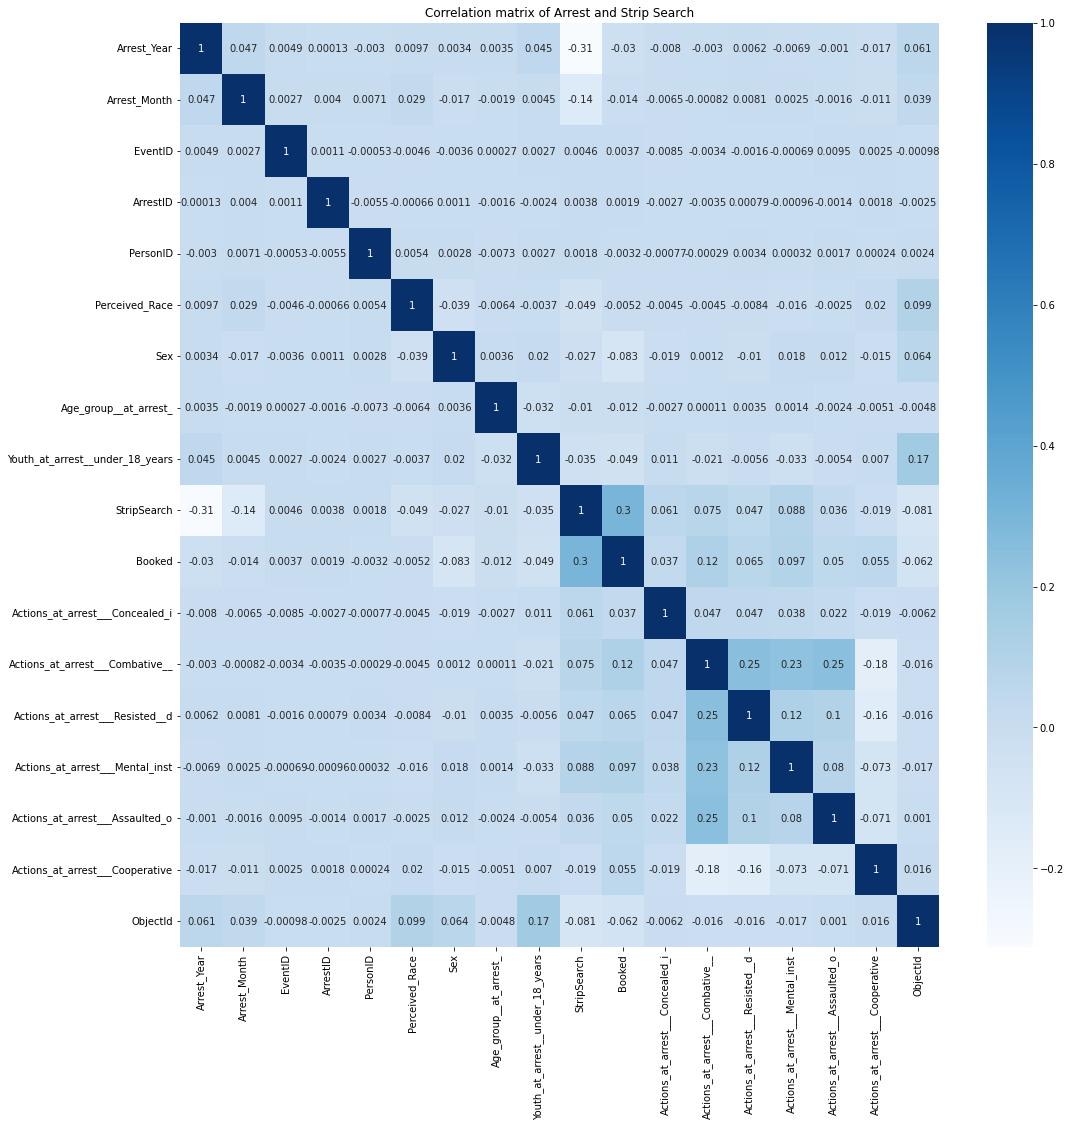

In [18]:
# Correlation Matrix
fig, ax = plt.subplots(figsize=(17, 17))
plt.title("Correlation matrix of Arrest and Strip Search")
corr = race_data.corr()
sns.heatmap(corr, cmap="Blues", annot=True)
plt.show()

In [19]:
# Research question 1
# Pick out columns which will needed for next step research
subset_data = race_copy[[
    'Arrest_Year','Perceived_Race', 'Sex', 'StripSearch']]
subset_data.head()

,Arrest_Year,Perceived_Race,Sex,StripSearch
0,2020,White,M,0
1,2020,White,M,0
2,2020,Unknown or Legacy,M,0
3,2021,Black,M,0
4,2021,South Asian,M,0


In [20]:
# based on the curent conditions, count the frequency of strip search
strip_count_data = subset_data[
    subset_data['StripSearch'] == 1].groupby(
        subset_data.columns.tolist(), as_index=False).size()

In [21]:
# change column name for size as count 
# current table is using for analysis research question 1
strip_count_data.rename(
    columns={'size':'Strip_search_counts'}, inplace=True)
final_data1 = strip_count_data.drop(
    columns = ['StripSearch'])
# Add one row as 2021 female with race Latino is not exsist be strip searching
final_data1.loc[len(final_data1.index)] = [2021, 'Latino', 'F', 0] 
final_data1

,Arrest_Year,Perceived_Race,Sex,Strip_search_counts
0,2020,Black,F,239
1,2020,Black,M,1984
2,2020,East/Southeast Asian,F,23
3,2020,East/Southeast Asian,M,272
4,2020,Indigenous,F,68
5,2020,Indigenous,M,218
6,2020,Latino,F,10
7,2020,Latino,M,116
8,2020,Middle-Eastern,F,15
9,2020,Middle-Eastern,M,191


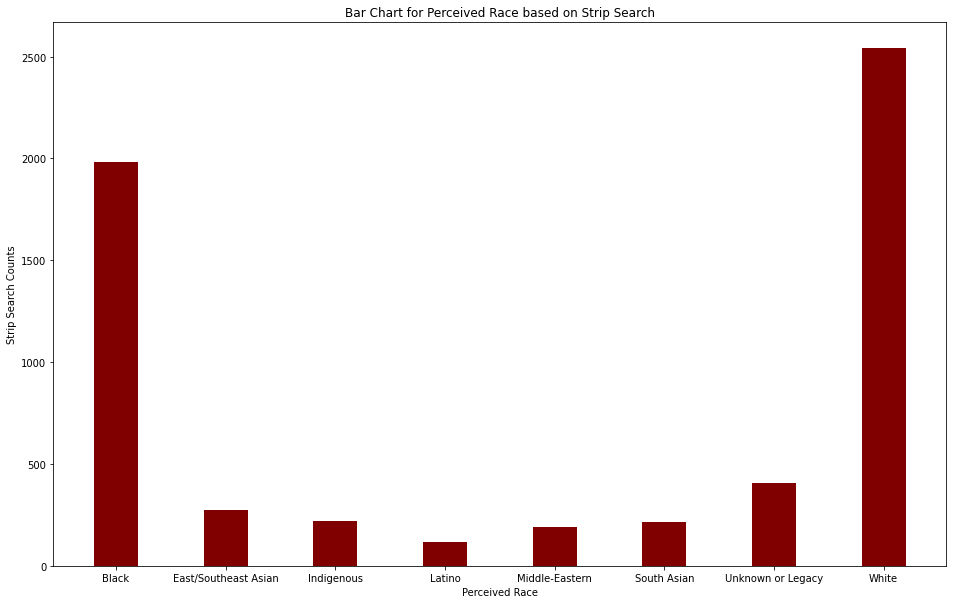

In [22]:
# Bar chart for race
fig = plt.figure(figsize = (16, 10))
# set up title and label
plt.bar(final_data1['Perceived_Race'], final_data1['Strip_search_counts'], 
        color ='maroon',
        width = 0.4)
plt.xlabel("Perceived Race")
plt.ylabel("Strip Search Counts")
plt.title("Bar Chart for Perceived Race based on Strip Search")
plt.show()

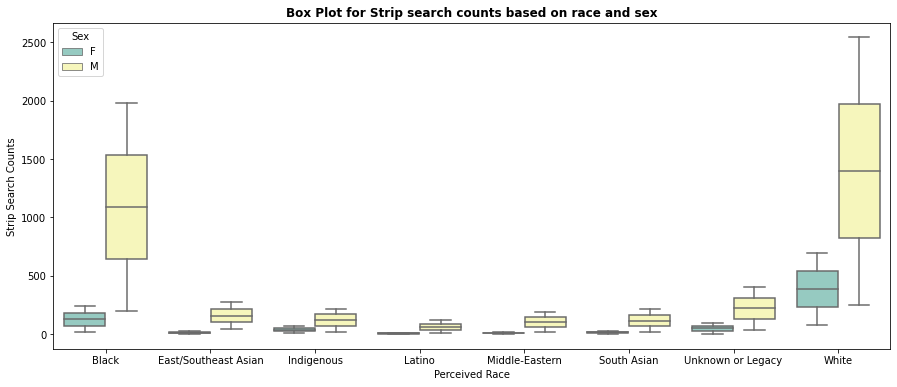

In [23]:
# Boxplot for Strip search counts based on sex and race
fig, ax = plt.subplots(figsize=(15, 6))
sns.boxplot(x="Perceived_Race", y="Strip_search_counts", 
            hue="Sex", data= final_data1, palette="Set3", ax = ax)
# Set up title and label
plt.title('Box Plot for Strip search counts based on race and sex', 
          fontweight='bold')
plt.xlabel("Perceived Race")
plt.ylabel("Strip Search Counts")
plt.show()

In [24]:
# summary statistics by sex based on strip search counts
final_data1[[
    'Strip_search_counts','Sex']].groupby('Sex').describe()

Strip_search_counts                                                  \
                  count      mean         std  min    25%    50%    75%   
Sex                                                                       
F                  16.0   80.1875  175.648216  0.0   3.75   15.5   71.0   
M                  16.0  407.3125  740.620435  6.0  31.00  193.0  252.5   

             
        max  
Sex          
F     698.0  
M    2542.0

In [25]:
# summary statistics by diffrenet race based on strip search counts
final_data1[['Strip_search_counts',
             'Perceived_Race']].groupby('Perceived_Race').describe()

Strip_search_counts                                     \
                                   count    mean          std   min     25%   
Perceived_Race                                                                
Black                                4.0  608.50   922.057301  16.0  150.25   
East/Southeast Asian                 4.0   85.25   125.675177   2.0   17.75   
Indigenous                           4.0   76.50    98.270036   6.0   12.00   
Latino                               4.0   33.00    55.485734   0.0    4.50   
Middle-Eastern                       4.0   57.00    89.591666   3.0   12.00   
South Asian                          4.0   64.25   101.019388   1.0   11.50   
Unknown or Legacy                    4.0  134.00   184.305905   4.0   27.25   
White                                4.0  891.50  1130.898610  80.0  204.50   

                                              
                        50%      75%     max  
Perceived_Race                                
Black                 217.0   675.25  1984.0  
East/Southeast Asian   33.5   101.00   272.0  
Indigenous             41.0   105.50   218.0  
Latino                  8.0    36.50   116.0  
Middle-Eastern         17.0    62.00   191.0  
South Asian            20.5    73.25   215.0  
Unknown or Legacy      63.5   170.25   405.0  
White                 472.0  1159.00  2542.0

In [26]:
# T test to see if there is gender differences
# Define male and female group
female_data = final_data1[final_data1['Sex'] == 'F']
male_data = final_data1[final_data1['Sex'] == 'M']
ttest_ind(female_data['Strip_search_counts'], male_data['Strip_search_counts'])

Ttest_indResult(statistic=-1.7190771928287845, pvalue=0.09590445239496274)

In [27]:
# T test to define the year differences
# Split into year 2020 and 2021
year_2020 = final_data1[final_data1['Arrest_Year'] == 2020]
year_2021 = final_data1[final_data1['Arrest_Year'] == 2021]
ttest_ind(year_2020['Strip_search_counts'], year_2021['Strip_search_counts'])

Ttest_indResult(statistic=2.1661662001913644, pvalue=0.038372692481571595)

In [28]:
# Filter data based on race differences
white_data = final_data1[final_data1[
    'Perceived_Race'] == 'White']['Strip_search_counts']
black_data = final_data1[final_data1[
    'Perceived_Race'] == 'Black']['Strip_search_counts']
unknown_data = final_data1[final_data1[
    'Perceived_Race'] == 'Unknown or Legacy']['Strip_search_counts']
east_a_data = final_data1[final_data1[
    'Perceived_Race'] == 'East/Southeast Asian']['Strip_search_counts']
south_a_data = final_data1[final_data1[
    'Perceived_Race'] == 'South Asian']['Strip_search_counts']
middle_e_data = final_data1[final_data1[
    'Perceived_Race'] == 'Middle-Eastern']['Strip_search_counts']
indi_data = final_data1[final_data1[
    'Perceived_Race'] == 'Indigenous']['Strip_search_counts']
lati_data = final_data1[final_data1[
    'Perceived_Race'] == 'Latino']['Strip_search_counts']

In [29]:
# One-way ANOVA based on race
statistic, pvalue = f_oneway(white_data, 
                             black_data, unknown_data, east_a_data, south_a_data, middle_e_data, indi_data, lati_data)
print(f'One-way ANOVA: s = {statistic}, p = {pvalue}')

One-way ANOVA: s = 1.5086187594829013, p = 0.21178585679991319


In [30]:
# perform Tukey's test for race
tukey = pairwise_tukeyhsd(endog= final_data1['Strip_search_counts'],
                          groups= final_data1['Perceived_Race'],
                          alpha=0.05)

#display results
print(tukey)

                 Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
       group1               group2        meandiff p-adj    lower      upper   reject
-------------------------------------------------------------------------------------
               Black East/Southeast Asian  -523.25 0.8255 -1754.1004  707.6004  False
               Black           Indigenous   -532.0 0.8126 -1762.8504  698.8504  False
               Black               Latino   -575.5 0.7486 -1806.3504  655.3504  False
               Black       Middle-Eastern   -551.5 0.7839 -1782.3504  679.3504  False
               Black          South Asian  -544.25 0.7946 -1775.1004  686.6004  False
               Black    Unknown or Legacy   -474.5 0.8973 -1705.3504  756.3504  False
               Black                White    283.0    0.9  -947.8504 1513.8504  False
East/Southeast Asian           Indigenous    -8.75    0.9 -1239.6004 1222.1004  False
East/Southeast Asian               Latino   -52.25    

In [31]:
# Two-way ANOVA
# for race and sex based on strip search
model = ols(
    'Strip_search_counts ~ C(Perceived_Race) + C(Sex) + \
    C(Perceived_Race):C(Sex)', 
    data = final_data1).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Perceived_Race),2917095.500,7.0,1.444954,0.255282
C(Sex),856086.125,1.0,2.968375,0.104175
C(Perceived_Race):C(Sex),1159032.375,7.0,0.574115,0.766762
Residual,4614436.000,16.0,NaN,NaN


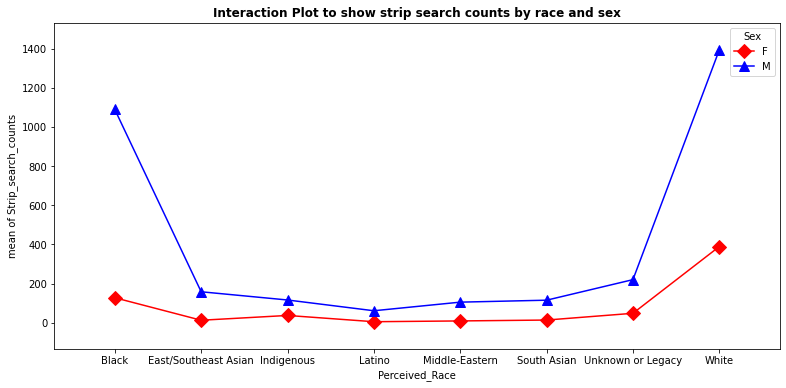

In [32]:
# Interactive plot for two way ANOVA
fig, ax = plt.subplots(figsize=(13, 6))
plt.title('Interaction Plot to show strip search counts by race and sex', 
          fontweight='bold')
plt.xlabel('Perceived Race')
plt.ylabel('Strip Search Count')
inte_fig = interaction_plot(final_data1.Perceived_Race, final_data1.Sex, 
                            final_data1.Strip_search_counts,
                            colors=['red','blue'], markers=['D','^'], 
                            ms=10, ax = ax)
plt.show()

In [33]:
# Research question part 2
# Pick columns as subset dataset 
subset_data2 = race_copy[[
    'Arrest_Year','Arrest_Month', 'Sex', 'Actions_at_arrest___Cooperative']]
subset_data2.head()

,Arrest_Year,Arrest_Month,Sex,Actions_at_arrest___Cooperative
0,2020,July-Sept,M,1
1,2020,July-Sept,M,0
2,2020,Oct-Dec,M,0
3,2021,Jan-Mar,M,0
4,2021,Jan-Mar,M,0


In [34]:
# Calaulte frequency by each column based on cooperation
coop_count_data = subset_data2[
    subset_data2['Actions_at_arrest___Cooperative'] == 1].groupby(
        subset_data2.columns.tolist(), as_index=False).size()
coop_count_data

,Arrest_Year,Arrest_Month,Sex,Actions_at_arrest___Cooperative,size
0,2020,Apr-June,F,1,493
1,2020,Apr-June,M,1,2601
2,2020,Jan-Mar,F,1,983
3,2020,Jan-Mar,M,1,3497
4,2020,July-Sept,F,1,665
5,2020,July-Sept,M,1,3074
6,2020,Oct-Dec,F,1,573
7,2020,Oct-Dec,M,1,2654
8,2021,Apr-June,F,1,649
9,2021,Apr-June,M,1,2929


In [35]:
# change column name from size to counts
# Drop original columns
# current table is using for analysis research question 2
coop_count_data.rename(columns={'size':'Cooperative_counts'}, inplace=True)
final_data2 = coop_count_data.drop(columns = [
    'Actions_at_arrest___Cooperative'])
final_data2

,Arrest_Year,Arrest_Month,Sex,Cooperative_counts
0,2020,Apr-June,F,493
1,2020,Apr-June,M,2601
2,2020,Jan-Mar,F,983
3,2020,Jan-Mar,M,3497
4,2020,July-Sept,F,665
5,2020,July-Sept,M,3074
6,2020,Oct-Dec,F,573
7,2020,Oct-Dec,M,2654
8,2021,Apr-June,F,649
9,2021,Apr-June,M,2929


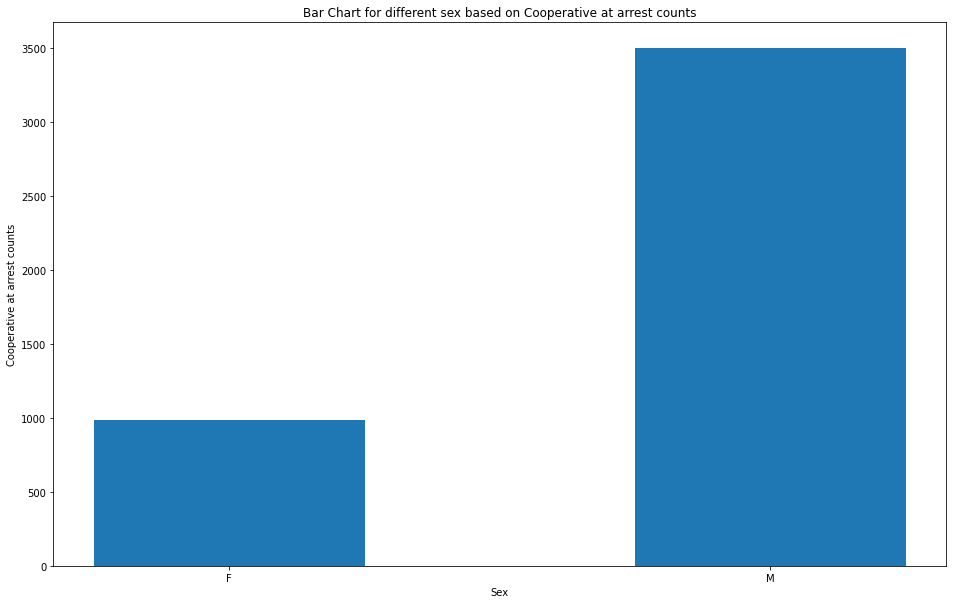

In [36]:
# Bar chart for sex based on cooperative at arrest counts
fig = plt.figure(figsize = (16, 10))
plt.bar(final_data2['Sex'], final_data2['Cooperative_counts'], 
        width = 0.5)
# Set title and label
plt.xlabel("Sex")
plt.ylabel("Cooperative at arrest counts")
plt.title("Bar Chart for different sex based on Cooperative at arrest counts")
plt.show()

In [37]:
# Calculate summary statistics by sex
final_data2[[
    'Cooperative_counts','Sex']].groupby('Sex').describe()

Cooperative_counts                                                         \
                 count      mean         std     min      25%     50%     75%   
Sex                                                                             
F                  8.0   678.750  141.484729   493.0   630.00   669.0   693.5   
M                  8.0  2959.375  275.699597  2601.0  2860.25  2940.0  3048.5   

             
        max  
Sex          
F     983.0  
M    3497.0

In [38]:
# Calculate summary statistics by Arrest Month
final_data2[[
    'Cooperative_counts','Arrest_Month']].groupby('Arrest_Month').describe()

Cooperative_counts                                               \
                          count     mean          std    min     25%     50%   
Arrest_Month                                                                   
Apr-June                    4.0  1668.00  1275.355637  493.0  610.00  1625.0   
Jan-Mar                     4.0  2024.25  1405.348207  673.0  905.50  1963.5   
July-Sept                   4.0  1841.25  1345.001952  665.0  683.75  1813.0   
Oct-Dec                     4.0  1742.75  1285.891487  573.0  671.25  1679.0   

                               
                  75%     max  
Arrest_Month                   
Apr-June      2683.00  2929.0  
Jan-Mar       3082.25  3497.0  
July-Sept     2970.50  3074.0  
Oct-Dec       2750.50  3040.0

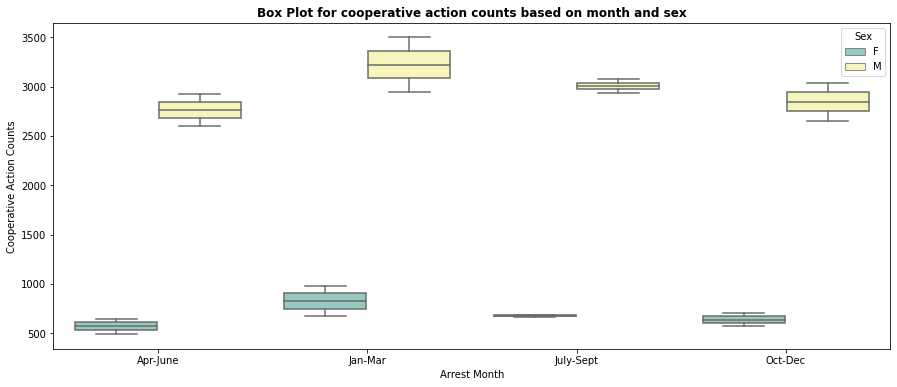

In [39]:
# Boxplot for Strip search counts based on sex and race
fig, ax = plt.subplots(figsize=(15, 6))
sns.boxplot(x ="Arrest_Month", y ="Cooperative_counts", 
            hue ="Sex", data = final_data2, palette = "Set3", ax = ax)
# Set title and label
plt.title('Box Plot for cooperative action counts based on month and sex', 
          fontweight='bold')
plt.xlabel("Arrest Month")
plt.ylabel("Cooperative Action Counts")
plt.show()

In [40]:
# T test to see if there is gender difference for cooperation
# Define male and female group
female_coop = final_data2[final_data2['Sex'] == 'F']
male_coop = final_data2[final_data2['Sex'] == 'M']
ttest_ind(male_coop['Cooperative_counts'], female_coop['Cooperative_counts'])

Ttest_indResult(statistic=20.816105874593134, pvalue=6.24875229640625e-12)

In [41]:
# T test to see if there is year difference for cooperation
# Define year data
year_2020_coop = final_data2[final_data2['Arrest_Year'] == 2020]
year_2021_coop = final_data2[final_data2['Arrest_Year'] == 2021]
ttest_ind(year_2021_coop['Cooperative_counts'], year_2020_coop['Cooperative_counts'])

Ttest_indResult(statistic=0.0050460971808653785, pvalue=0.9960450136114667)

In [42]:
# Filter data based on different month
firstq_data = final_data2[final_data2['Arrest_Month'] == 'Apr-June']['Cooperative_counts']
secondq_data = final_data2[final_data2['Arrest_Month'] == 'Jan-Mar']['Cooperative_counts']
thirdq_data = final_data2[final_data2['Arrest_Month'] == 'July-Sept']['Cooperative_counts']
forthq_data = final_data2[final_data2['Arrest_Month'] == 'Oct-Dec']['Cooperative_counts']

In [43]:
# One-way ANOVA based on month
statistic, pvalue = f_oneway(firstq_data, 
                             secondq_data, thirdq_data, forthq_data)
print(f'One-way ANOVA: s = {statistic}, p = {pvalue}')

One-way ANOVA: s = 0.05378394668437314, p = 0.9827733233266066


In [44]:
# perform Tukey's test by month
tukey = pairwise_tukeyhsd(endog= final_data2['Cooperative_counts'],
                          groups= final_data2['Arrest_Month'],
                          alpha=0.05)

#display results
print(tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1    group2  meandiff p-adj   lower      upper   reject
--------------------------------------------------------------
 Apr-June   Jan-Mar   356.25   0.9 -2433.9137 3146.4137  False
 Apr-June July-Sept   173.25   0.9 -2616.9137 2963.4137  False
 Apr-June   Oct-Dec    74.75   0.9 -2715.4137 2864.9137  False
  Jan-Mar July-Sept   -183.0   0.9 -2973.1637 2607.1637  False
  Jan-Mar   Oct-Dec   -281.5   0.9 -3071.6637 2508.6637  False
July-Sept   Oct-Dec    -98.5   0.9 -2888.6637 2691.6637  False
--------------------------------------------------------------


In [45]:
# Two way ANOVA based on month and sex
model = ols(
    'Cooperative_counts ~ C(Arrest_Month) + C(Sex) + C(Arrest_Month):C(Sex)', 
    data = final_data2).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Arrest_Month),2.849507e+05,3.0,2.111758,1.770237e-01
C(Sex),2.080500e+07,1.0,462.555009,2.300125e-08
C(Arrest_Month):C(Sex),2.741919e+04,3.0,0.203202,8.913329e-01
Residual,3.598275e+05,8.0,NaN,NaN


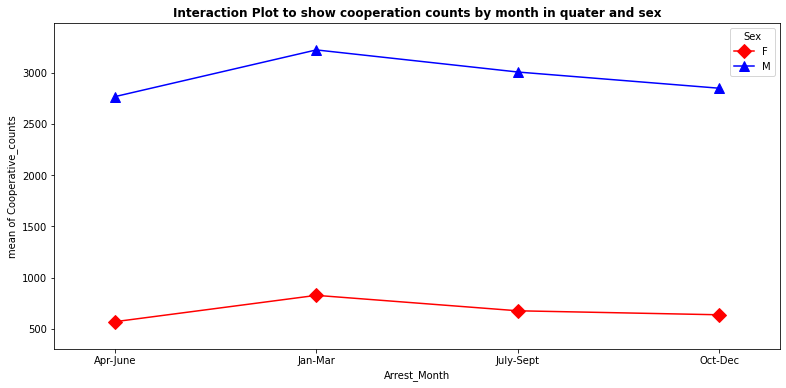

In [46]:
# Interaction Plot for month and sex based on cooperative counts
fig, ax = plt.subplots(figsize=(13, 6))
# Set title and table
plt.title(
    'Interaction Plot to show cooperation counts by month in quater and sex', 
    fontweight='bold')
plt.xlabel('Perceived Race')
plt.ylabel('Cooperative action Count')
inte_fig = interaction_plot(final_data2.Arrest_Month, 
                            final_data2.Sex, final_data2.Cooperative_counts,
                            colors=['red','blue'], markers=['D','^'], 
                            ms = 10, ax = ax)
plt.show()